In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from fitter import Fitter
import os
# ?Fitter

# HSV mask method

In [2]:
# $$$-----AOI is for Area$Of$Interest------$$$ #
def getAOI(img_name):
    areas = []                                       # array of areas of interest
    img = cv2.imread(img_name, cv2.IMREAD_COLOR)     # image matrix
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # image matrix copy in RGB format
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # image matrix copy in HSV format
    lower_red = np.array([0,254,250])                # lower mask value
    upper_red = np.array([10,255,255])               # upper mask value

    mask_hsv = cv2.inRange(img_hsv, lower_red, upper_red)          # mask in hsv format
    masked_img = cv2.bitwise_and(img, img, mask=mask_hsv)          # mask applying
    grey_threshold = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)  # thresholded image
    contours, _ = cv2.findContours(grey_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # contours recognition
    for ind, cnt in enumerate(contours[::2]):
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)   # counting edges of contour
        if len(approx) == 4:
            x,y,w,h = cv2.boundingRect(cnt)                                   # rectangle cordinates
            areas.append(cv2.cvtColor(img_rgb[y + 1:y - 1 + h, x + 1:x - 1 + w], cv2.COLOR_BGR2GRAY))
    return areas


## Collecting AOIs from every image in the folder

In [6]:
# $$$-------Gathering AOIs from every image of the folder!--------$$$ #
def gather_data(load_folder, save_folder):
    image_files = os.listdir(load_folder)
    data = []
    for img in image_files:
        img_path = os.path.join(load_folder, img)
        areas = getAOI(img_path)
        for ind in range(len(areas)):
            area_fname = f"{img.split('.')[0]}_{ind + 1}.bmp"
            area_fname = os.path.join(save_folder, area_fname)
            cv2.imwrite(area_fname, areas[ind])
#             data.append(getNormArr(areas[ind].flatten()))   #norminate every image 
            data.append(areas[ind].flatten())              #append with common image
    return data     # returning array of images

def getNormArr(a):
    normArr = []
    for i in range(len(a) - 1):
        z = int(a[i + 1]) - int(a[i])
        normArr.append(z)
    minArr = abs(min(normArr))
    for i in range(len(normArr)):
        normArr[i] += minArr
    return normArr

In [3]:
# $$$-------Gathering AOIs from every image of the folder!--------$$$ #
def gather_and_normalize_data(load_folder, save_folder):
    image_files = os.listdir(load_folder)
    data = []
    for img in image_files:
        img_path = os.path.join(load_folder, img)
        areas = getAOI(img_path)
        for ind in range(len(areas)):
            area_fname = f"{img.split('.')[0]}_{ind + 1}.bmp"
            area_fname = os.path.join(save_folder, area_fname)
            norm_image = normalize_image(areas[ind])
            cv2.imwrite(area_fname, norm_image)
            data.append(norm_image.flatten())              #append with common image
    return data     # returning array of images

def normalize_image(a):
    im_shape = a.shape
    a = a.flatten()
    normArr = []
    normArr.append(a[0])
    for i in range(len(a) - 1):
        z = int(a[i + 1]) - int(a[i])
        normArr.append(z)
    minArr = abs(min(normArr))
    for i in range(len(normArr)):
        normArr[i] += minArr
    return np.array(normArr).reshape(im_shape)

#                          Gathering AOIs from  
## C:\Users\User\Documents\notebooks\linear_sensor_pat\Cirrhosis

Fitted norm distribution with error=0.002906422006340073)
Fitted kstwobign distribution with error=0.00160564464025606)
Fitted rayleigh distribution with error=0.0021388871039437914)
Fitted rice distribution with error=0.002138888079181224)
Fitted genlogistic distribution with error=0.0014099679112174887)


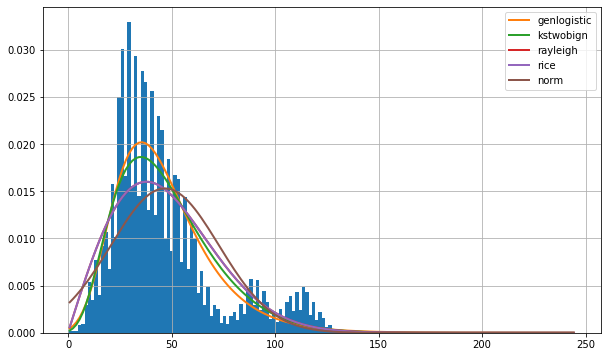

In [5]:
save_dir = "C:\\Users\\User\\Documents\\notebooks\\AOI_lin_sens_pat_Cirrhosis_norm"
load_dir = "C:\\Users\\User\\Documents\\notebooks\\linear_sensor_pat\\Cirrhosis"
result_dir = "C:\\Users\\User\\Documents\\notebooks\\Cirrhosis_result_norm"
# os.mkdir(save_dir)
# os.mkdir(result_dir)
diseases_folders = os.listdir(load_dir)

data = gather_and_normalize_data(load_dir, save_dir)
conc_data = np.concatenate(data)
f = Fitter(conc_data, timeout=15, bins=len(set(conc_data)), distributions=['norm', 'kstwobign', 'rayleigh', 'rice', 'genlogistic'])
f.fit()
plt.figure(figsize=(10,6))
sumry = f.summary()
plt.savefig(os.path.join(result_dir, "distr_plot.png"))
sumry.to_excel(os.path.join(result_dir, "analys_numbers.xlsx"))


       

In [3]:
project_dir = os.path.join("C:\\", "Users", "User", "Documents", "notebooks")
load_dirs = os.path.join(project_dir, "linear_sensor_pat")
save_dirs = os.path.join(project_dir, "linear_sensor_pat_AOI")
diseases_folders = os.listdir(load_dirs)
for dis in diseases_folders:
    os.mkdir(os.path.join(save_dirs, dis))

In [ ]:

diseases_folders = os.listdir(load_dirs)
os.mkdir(save_dir)
for dis in diseases_folders:
    dis_save = os.path.join(save_dirs, dis)
    data = gather_data(dis, dis_save)
    conc_data = np.concatenate(data)
    f = Fitter(conc_data)
    f.fit()
    plt.figure(figsize=(10,6))
    sumry = f.summary()
    plt.savefig(os.path.join(dis_save, dis + "_plot_best.png"))
    sumry.to_excel(os.path.join(dis_save, dis + "_fitting_data_best.xlsx"))


In [9]:
# sumry.to_excel("kek.xlsx")
plt.savefig("abc.png")
# f.hist()
sumry

,sumsquare_error,aic,bic,kl_div
genlogistic,0.000060,1478.476108,-4.402292e+07,inf
kstwobign,0.000078,1617.305986,-4.355640e+07,inf
norm,0.000224,2194.774931,-4.162982e+07,inf
rayleigh,0.000629,1515.044655,-3.974405e+07,inf


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=0.0002984639823744198)
Fitted anglit distribution with error=0.00391972496407236)
Fitted arcsine distribution with error=0.0050304500753019414)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1682: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


Fitted argus distribution with error=0.00525289188425571)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Fitted beta distribution with error=0.0002569026623652908)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


SKIPPED betaprime distribution (taking more than 120 seconds)
Fitted bradford distribution with error=0.0028468016364251014)
SKIPPED burr distribution (taking more than 120 seconds)
SKIPPED burr12 distribution (taking more than 120 seconds)
Fitted cauchy distribution with error=0.000854227030556525)
SKIPPED chi distribution (taking more than 120 seconds)
SKIPPED chi2 distribution (taking more than 120 seconds)
Fitted cosine distribution with error=0.0033641939142489753)
SKIPPED crystalball distribution (taking more than 120 seconds)
Fitted dgamma distribution with error=0.000620868855575849)
Fitted dweibull distribution with error=0.0005949754302416405)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.25.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.75.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.833333333333334.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.958333333333334.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.3343915078993245.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.033899257148569.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8966351612472003.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.360594358707861.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.806951314937976.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7880666300711083.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7889514932400523.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7825557144455413.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7900805697860473.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.789157240577266.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.790402890057358.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.7907605190033173.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the 

Fitted erlang distribution with error=0.0002631861057370891)
Fitted expon distribution with error=0.002551871224966962)
Fitted exponnorm distribution with error=0.0003470743498939528)
SKIPPED exponpow distribution (taking more than 120 seconds)
SKIPPED exponweib distribution (taking more than 120 seconds)
SKIPPED f distribution (taking more than 120 seconds)
SKIPPED fatiguelife distribution (taking more than 120 seconds)
SKIPPED fisk distribution (taking more than 120 seconds)
Fitted foldcauchy distribution with error=0.07225957868163316)
SKIPPED foldnorm distribution (taking more than 120 seconds)
SKIPPED frechet_l distribution (taking more than 120 seconds)
SKIPPED frechet_r distribution (taking more than 120 seconds)
Fitted gamma distribution with error=0.00026318580362851614)
SKIPPED gausshyper distribution (taking more than 120 seconds)
SKIPPED genexpon distribution (taking more than 120 seconds)
SKIPPED genextreme distribution (taking more than 120 seconds)
SKIPPED gengamma distr

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2282: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


SKIPPED genpareto distribution (taking more than 120 seconds)
Fitted gilbrat distribution with error=0.0012939961281204497)
Fitted gompertz distribution with error=0.022857997526321505)
Fitted gumbel_l distribution with error=0.001277978230652768)
Fitted gumbel_r distribution with error=0.0002971268244110827)
Fitted halfcauchy distribution with error=0.002248210226074398)
Fitted halfgennorm distribution with error=0.006359046636311737)
Fitted halflogistic distribution with error=0.0015763183092469104)
Fitted halfnorm distribution with error=0.0013775030666276214)
Fitted hypsecant distribution with error=0.0006002570914581836)
Fitted invgamma distribution with error=0.0002925313497186208)
Fitted invgauss distribution with error=0.0002733212974336932)
SKIPPED invweibull distribution (taking more than 120 seconds)
SKIPPED johnsonsb distribution (taking more than 120 seconds)
SKIPPED johnsonsu distribution (taking more than 120 seconds)
SKIPPED kappa3 distribution (taking more than 120 sec

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


SKIPPED ksone distribution (taking more than 120 seconds)
Fitted kstwobign distribution with error=0.0002639453333787717)
Fitted laplace distribution with error=0.0008574282631104689)
Fitted levy distribution with error=0.0023762535608617937)
Fitted levy_l distribution with error=0.005429905742469322)
SKIPPED levy_stable distribution (taking more than 120 seconds)
SKIPPED loggamma distribution (taking more than 120 seconds)
Fitted logistic distribution with error=0.0005729246816542871)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4339: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


SKIPPED loglaplace distribution (taking more than 120 seconds)
SKIPPED lognorm distribution (taking more than 120 seconds)
SKIPPED lomax distribution (taking more than 120 seconds)
Fitted maxwell distribution with error=0.0003786980598923947)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1675: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1675: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


SKIPPED mielke distribution (taking more than 120 seconds)
Fitted moyal distribution with error=0.0003066464027586235)
Fitted nakagami distribution with error=0.00028891879184512873)
SKIPPED ncf distribution (taking more than 120 seconds)
SKIPPED nct distribution (taking more than 120 seconds)
SKIPPED ncx2 distribution (taking more than 120 seconds)
Fitted norm distribution with error=0.0005918072863660378)
SKIPPED norminvgauss distribution (taking more than 120 seconds)
SKIPPED pareto distribution (taking more than 120 seconds)
SKIPPED pearson3 distribution (taking more than 120 seconds)
SKIPPED powerlaw distribution (taking more than 120 seconds)
SKIPPED powerlognorm distribution (taking more than 120 seconds)
SKIPPED powernorm distribution (taking more than 120 seconds)
Fitted rayleigh distribution with error=0.00029588853688308894)
SKIPPED rdist distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1675: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2380: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


SKIPPED recipinvgauss distribution (taking more than 120 seconds)
SKIPPED reciprocal distribution (taking more than 120 seconds)
SKIPPED rice distribution (taking more than 120 seconds)
SKIPPED rv_continuous distribution (taking more than 120 seconds)
SKIPPED rv_histogram distribution (taking more than 120 seconds)
SKIPPED semicircular distribution (taking more than 120 seconds)
SKIPPED skewnorm distribution (taking more than 120 seconds)
SKIPPED t distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5737: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


SKIPPED trapz distribution (taking more than 120 seconds)
SKIPPED triang distribution (taking more than 120 seconds)
Fitted truncexpon distribution with error=0.0030203643416371715)
SKIPPED truncnorm distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6470: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED tukeylambda distribution (taking more than 120 seconds)
Fitted uniform distribution with error=0.004398796320756309)
Fitted vonmises distribution with error=3.984996967270541e+57)
SKIPPED vonmises_line distribution (taking more than 120 seconds)
Fitted wald distribution with error=0.0010698250488377472)
SKIPPED weibull_max distribution (taking more than 120 seconds)
SKIPPED weibull_min distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


Fitted wrapcauchy distribution with error=nan)


,sumsquare_error,aic,bic,kl_div
beta,0.000257,2048.297712,-7.056372e+07,inf
gamma,0.000263,1763.529374,-7.049023e+07,inf
erlang,0.000263,1763.530526,-7.049022e+07,inf
kstwobign,0.000264,2005.735608,-7.048148e+07,inf
invgauss,0.000273,1689.293244,-7.037527e+07,inf


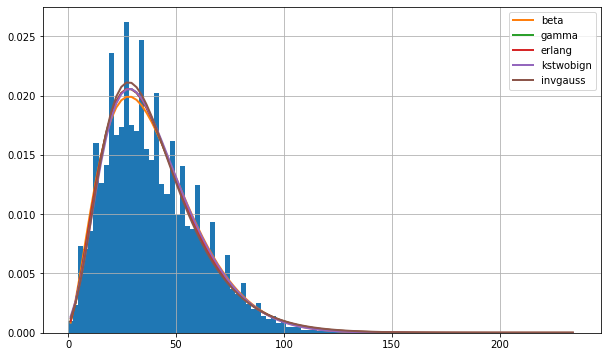

In [5]:
# Counting images with norm with linear sensor
load_folder = "linear_norm"
save_folder = "aoi_linear_norm"
data = gather_data(load_folder, save_folder)   #array of images
conc_data = np.concatenate(data)
f = Fitter(conc_data, timeout=120)
f.fit()
plt.figure(figsize=(10,6))
f.summary()

In [1]:
plt.figure(figsize=(10,6))
f.summary()

NameError: name 'plt' is not defined

In [ ]:
# Counting images with patology with linear sensor
load_folder = "linear_pat"
save_folder = "aoi_linear_pat"
data = gather_data(load_folder, save_folder)   #array of images
conc_data = np.concatenate(data)
f = Fitter(conc_data, timeout=120)
f.fit()
plt.figure(figsize=(10,6))
f.summary()

SKIPPED alpha distribution (taking more than 120 seconds)
SKIPPED anglit distribution (taking more than 120 seconds)
SKIPPED arcsine distribution (taking more than 120 seconds)
SKIPPED argus distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


SKIPPED beta distribution (taking more than 120 seconds)
SKIPPED betaprime distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:7177: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)


SKIPPED bradford distribution (taking more than 120 seconds)
SKIPPED burr distribution (taking more than 120 seconds)
SKIPPED burr12 distribution (taking more than 120 seconds)
Fitted cauchy distribution with error=0.0006220873146429511)
SKIPPED chi distribution (taking more than 120 seconds)
SKIPPED chi2 distribution (taking more than 120 seconds)
SKIPPED cosine distribution (taking more than 120 seconds)
SKIPPED crystalball distribution (taking more than 120 seconds)
SKIPPED dgamma distribution (taking more than 120 seconds)
SKIPPED dweibull distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.3500000000000005.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.6499999999999995.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.766666666666666.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.941666666666666.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.988026536419519.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.978364522109301.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.019793660324579.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.990368924517702.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the er

SKIPPED erlang distribution (taking more than 120 seconds)
Fitted expon distribution with error=0.0024576411393890567)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.9864764577804355.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.0254683625559835.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.0430180815751235.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.067055245156375.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.839834377475266.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.835409599959643.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.88910975862573.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.820687268462365.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erl

SKIPPED exponnorm distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.829148081274795.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.821877418047278.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.819356188963928.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.814219675269204.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the er

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.826955323986757.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.827040312363071.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.826955593382354.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.827001208646063.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the er

SKIPPED exponpow distribution (taking more than 120 seconds)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.826948583275339.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.826923418340809.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.826947549621968.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.8270095061023.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erla

SKIPPED exponweib distribution (taking more than 120 seconds)
SKIPPED f distribution (taking more than 120 seconds)
SKIPPED fatiguelife distribution (taking more than 120 seconds)
SKIPPED fisk distribution (taking more than 120 seconds)
SKIPPED foldcauchy distribution (taking more than 120 seconds)
SKIPPED foldnorm distribution (taking more than 120 seconds)
SKIPPED frechet_l distribution (taking more than 120 seconds)
SKIPPED frechet_r distribution (taking more than 120 seconds)
SKIPPED gamma distribution (taking more than 120 seconds)
SKIPPED gausshyper distribution (taking more than 120 seconds)
SKIPPED genexpon distribution (taking more than 120 seconds)
SKIPPED genextreme distribution (taking more than 120 seconds)
SKIPPED gengamma distribution (taking more than 120 seconds)
SKIPPED genhalflogistic distribution (taking more than 120 seconds)
SKIPPED genlogistic distribution (taking more than 120 seconds)
SKIPPED gennorm distribution (taking more than 120 seconds)
SKIPPED genpareto

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1675: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


SKIPPED powernorm distribution (taking more than 120 seconds)
SKIPPED rayleigh distribution (taking more than 120 seconds)
SKIPPED rdist distribution (taking more than 120 seconds)
SKIPPED recipinvgauss distribution (taking more than 120 seconds)



# Custom color filtering method

In [115]:
# Custom color filtering method
img = cv2.imread("4.bmp", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = img.copy()
for i in r:
    for j in i:
        if j[2] == j[1] or j[2] != 255:
            j[0] = j[1] = j[2] = 0
lower_red = np.array([0,250,250])
upper_red = np.array([10,255,255])



_, threshold = cv2.threshold(r, 254, 255, cv2.THRESH_BINARY)
gray_thrashold = cv2.cvtColor(threshold, cv2.COLOR_BGR2GRAY)
contours,hierarchy = cv2.findContours(gray_thrashold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for ind, cnt in enumerate(contours[::2]):
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.imwrite(f'roi_{ind + 1}.bmp', img_rgb[y + 1:y - 1 + h, x + 1:x - 1 + w])

6
(608, 800)
(608, 800, 3)


In [ ]:
    # cv2.fillPoly(m, pts =contours[::2], color=(255,255,255))
# plt.figure(figsize=(20,20))
# plt.imshow(m)
# font = cv2.FONT_HERSHEY_COMPLEX
# for cnt in contours[::2]:
#     approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    
#     cv2.drawContours(img_rgb, [cnt], 0, (255), 1)

# # #     print(len(approx))
#     print(approx[0])

# # len(contours)
# # cv2.drawContours(img_rgb, contours, -1, (0,255,0), 1)

# # # np.unique(gray_thrashold)

# approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
# threshold.shape
# threshold.shape
# contours,hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.drawContours(img_rgb, contours[10], -1, (0,255,0), 5)
# plt.figure(figsize=(15,15))
# plt.imshow(img_rgb)
# cv2.imshow("red_channel", r)
# cv2.imshow("threshold", threshold)
# cv2.imshow("Mask", mask)
# contours, _= cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX
# def get_rects
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    print(approx[0])
    #     cv2.drawContours(img, [approx], 0, (0), 5)
#     x = approx.ravel()[0]
#     y = approx.ravel()[1]
#     if len(approx) == 4:
#         cv2.putText(img, "Rectangle", (x, y), font, 1, (0))
        
        
cv2.imshow("shapes", img)
# cv2.imshow("Threshold", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [96]:
!pip install opencv-contrib-python

"sudo" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


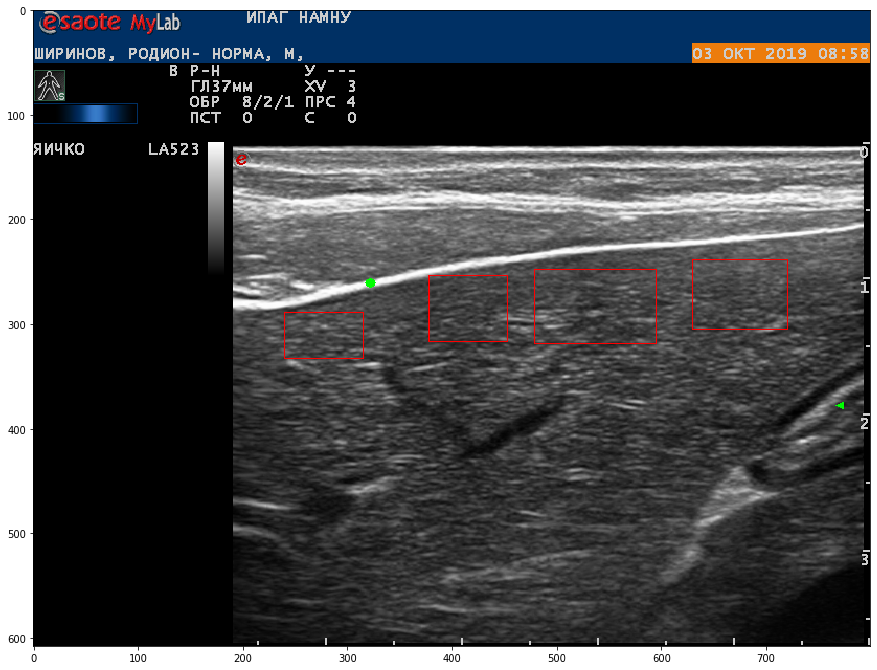

In [54]:
base_img_bgr = cv2.imread("9.bmp")
gray_img = cv2.imread("9.bmp", 0)
base_img_rgb = cv2.cvtColor(base_img_bgr, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(base_img_rgb)
ret,thresh = cv2.threshold(r, 254,255, cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours.sort(key=lambda x: x[0].all())
# contours[0]
# # np.sort(con)
cv2.drawContours(base_img_rgb, contours[10], -1, (0,255,0), 5)
# # list_rects = [rect for rect in contours[1:5]]
plt.figure(figsize=(15,15))
plt.imshow(base_img_rgb)



# edges = cv2.Canny(r, 254, 254)
# lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
# for rho,theta in lines[0]:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))
#     cv2.line(base_img_rgb,(x1,y1),(x2,y2),(0,0,255),2)

# plt.figure(figsize=(15,15))
# plt.imshow(edges, cmap='gray')

# edged = cv2.Canny(gray, 30, 200)
